In [37]:
import numpy as np

from scipy import optimize
from scipy.stats import chi2, norm

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
%matplotlib inline

# Variabili $z$ e $\chi^2$

Estraiamo $n$ numeri casuali da una distribuzione gaussiana (normale) standard, di media $\mu_x=0$ e deviazione standard $\sigma_x=1$ 

In [2]:
n = 500
norm_data = np.random.normal(size=n)

Con `matplotlib` possiamo graficare il loro **istogramma**

(array([0.02569876, 0.03854814, 0.03212345, 0.11564442, 0.15419256,
        0.14776787, 0.27626167, 0.27626167, 0.39190609, 0.41760485,
        0.32765919, 0.32765919, 0.26341229, 0.19916539, 0.10279504,
        0.0642469 , 0.01284938, 0.03212345, 0.        , 0.00642469]),
 array([-2.85762133, -2.54632227, -2.2350232 , -1.92372414, -1.61242507,
        -1.30112601, -0.98982694, -0.67852788, -0.36722881, -0.05592975,
         0.25536932,  0.56666838,  0.87796745,  1.18926651,  1.50056558,
         1.81186464,  2.12316371,  2.43446277,  2.74576184,  3.0570609 ,
         3.36835997]),
 <BarContainer object of 20 artists>)

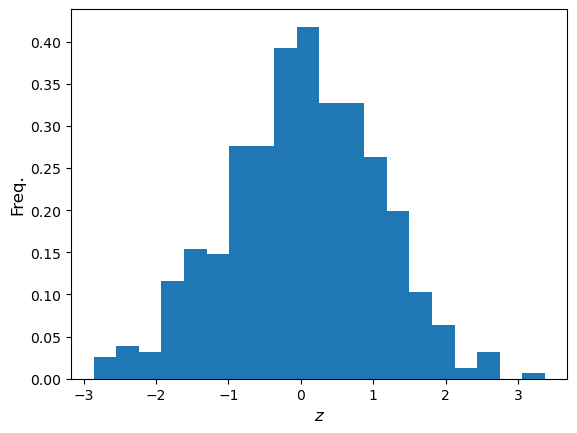

In [3]:
fig,ax = plt.subplots()

ax.set_xlabel('$z$',fontsize=12)
ax.set_ylabel('Freq.',fontsize=12)

ax.hist(norm_data,bins=20,density=True)
#ax.hist(norm_data,density=True)

Possiamo confrontare l'istogramma dei dati con la distribuzione teorica da cui sono stati estratti.<br>
Valutiamo e plottiamo una distribuzione normale standard su un intervallo di valori fra -4 e 4. La distribuzione normale è caricata da `scipy` come `norm`, di cui vogliamo la PDF: `norm.pdf()`.

In [4]:
data_ran = np.arange(-3,3,0.05)

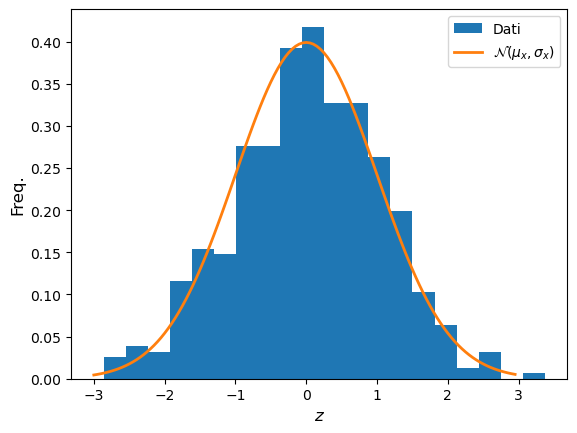

In [5]:
fig,ax = plt.subplots()

ax.set_xlabel('$z$',fontsize=12)
ax.set_ylabel('Freq.',fontsize=12)

ax.hist(norm_data,bins=20,density=True,label='Dati')
ax.plot(data_ran,norm.pdf(data_ran),lw=2,label='$\mathcal{N}(\mu_x,\sigma_x)$')

ax.legend(loc='upper right')

Immaginiamo ora di ripetere $N$ volte questo esperimento: 
1) estraiamo $n$ numeri casuali $x_i$ da una gaussiana standard,
2) calcoliamo la somma $z=\sum_i^nx_i$
   
Sommiamo gli $N$ valori $z$ ottenuti

In [6]:
n = 10
N = 5000

In [7]:
x_arr = np.array([ np.random.normal(size=n) for i in range(N) ])
z = np.sum(x_arr,axis=1)

Possiamo valutare ora come si distribuiscono gli $N$ valori $z$

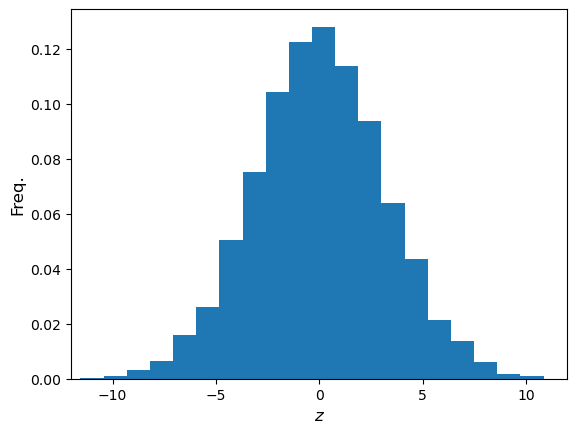

In [8]:
fig,ax = plt.subplots()

ax.set_xlim(-12,12)

ax.set_xlabel('$z$',fontsize=12)
ax.set_ylabel('Freq.',fontsize=12)

val = ax.hist(z,bins=20,density=True)

Gli $N$ valori $z=\sum_i^n x_i$ sono distribuiti come una **variabile gaussiana** di media e varianza
$$
\mu = \sum_i^n \mu_i,\qquad \sigma^2=\sum_i^n\sigma_z^2
$$

In [9]:
mu = 0
sigma = np.sqrt(n)

In [10]:
data_ran2 = np.arange(z.min(),z.max(),0.1)

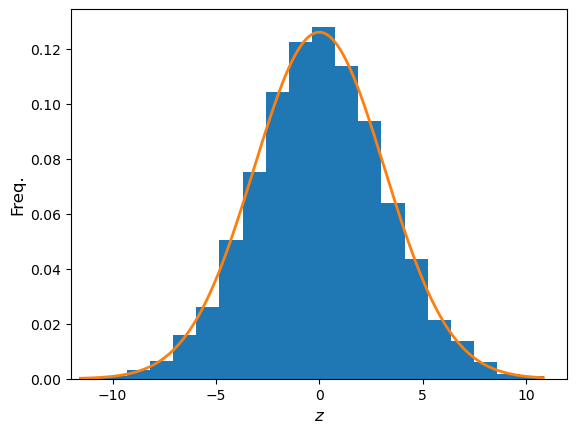

In [11]:
fig,ax = plt.subplots()

ax.set_xlim(-12,12)

ax.set_xlabel('$z$',fontsize=12)
ax.set_ylabel('Freq.',fontsize=12)

val = ax.hist(z,bins=20,density=True)
ax.plot(data_ran2,norm.pdf(data_ran2,mu,sigma),lw=2)

## Il chi-quadro

Valutiamo ora come si distribuiscono le **somme dei quadrati** di $x$:
$$
\chi^2 = \sum_i^n x_i^2
$$

In [12]:
chi_square = np.sum(x_arr**2,axis=1)

(array([0.00982578, 0.04804915, 0.07979398, 0.09577438, 0.09372284,
        0.0735314 , 0.05193627, 0.03466017, 0.02224298, 0.01392886,
        0.00669449, 0.00367117, 0.00345522, 0.00151166, 0.0004319 ,
        0.0004319 , 0.00010798, 0.        , 0.        , 0.00010798]),
 array([ 1.28408504,  3.13635499,  4.98862494,  6.84089489,  8.69316484,
        10.54543479, 12.39770473, 14.24997468, 16.10224463, 17.95451458,
        19.80678453, 21.65905448, 23.51132443, 25.36359438, 27.21586433,
        29.06813428, 30.92040423, 32.77267418, 34.62494413, 36.47721408,
        38.32948403]),
 <BarContainer object of 20 artists>)

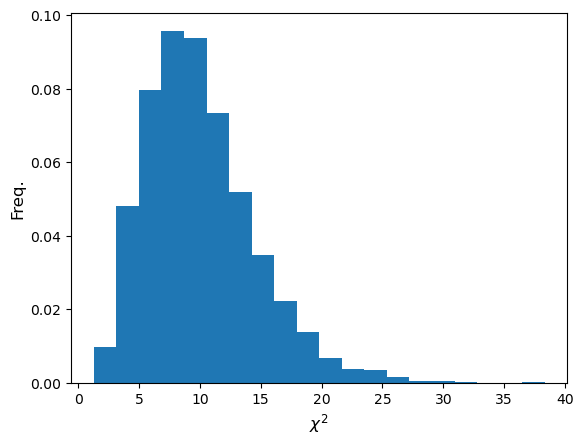

In [13]:
fig,ax = plt.subplots()

ax.set_xlabel('$\chi^2$',fontsize=12)
ax.set_ylabel('Freq.',fontsize=12)

ax.hist(chi_square,bins=20,density=True)

La variabile $\chi^2$ è una variabile aleatoria distribuita secondo una particolare distribuzione detta del **chi-quadro**:
$$
PDF(\chi^2;n)=\frac{1}{2^{n/2}\Gamma(\frac{n}{2})}(\chi^2)^{n/2-1}e^{-\chi^2/2}
$$
Possiamo disegnare la PDF della distribuzione chi-quadro da `scipy` come `chi2.pdf()`.<br>
La distribuzione chi-quadro dipende dal valore $n$ che compare nella definizione di $\chi^2=\sum_i^nz^2$. In generale, $n$ è detto **numero di gradi di libertà**.<br>
Nel nostro caso abbiamo quindi

In [14]:
chiran = np.arange(0,chi_square.max(),0.05)

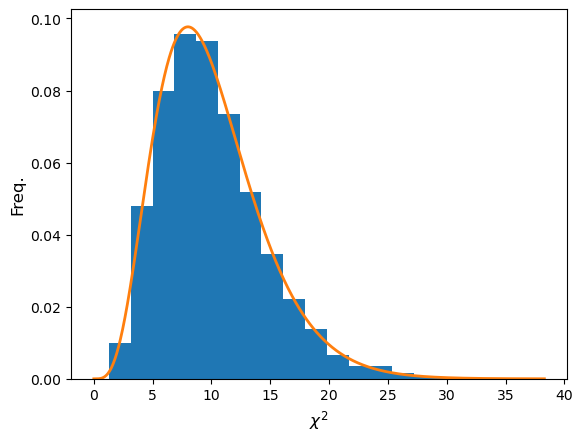

In [15]:
fig,ax = plt.subplots()

ax.set_xlabel('$\chi^2$',fontsize=12)
ax.set_ylabel('Freq.',fontsize=12)

ax.hist(chi_square,bins=20,density=True)
ax.plot(chiran,chi2.pdf(chiran,n),lw=2)

Cambiamo il valore di $n$

In [16]:
n=15
chi_square = np.array([ np.sum(np.random.normal(size=n)**2) for i in range(N) ])

In [17]:
chiran = np.arange(0,chi_square.max(),0.1)

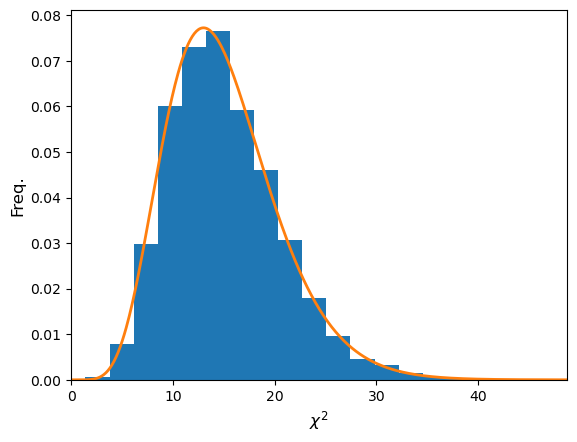

In [18]:
fig,ax = plt.subplots()

ax.set_xlim(0,chi_square.max())

ax.set_xlabel('$\chi^2$',fontsize=12)
ax.set_ylabel('Freq.',fontsize=12)

ax.hist(chi_square,bins=20,density=True)
ax.plot(chiran,chi2.pdf(chiran,n),lw=2)

In [19]:
Nmax = 11
chiran = np.arange(0,30,0.05)
colors = plt.cm.viridis(np.linspace(0,1,Nmax))

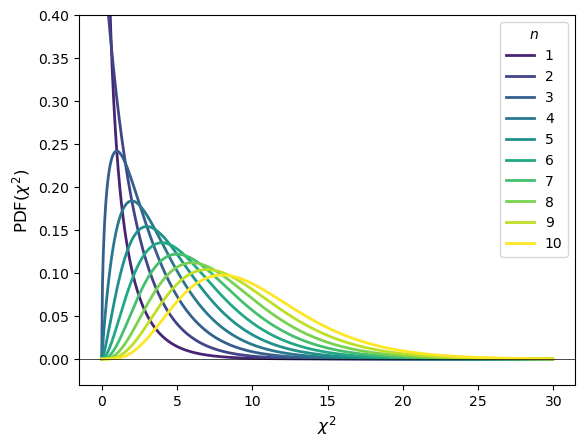

In [20]:
fig,ax = plt.subplots()

ax.set_ylim(-.03,.4)
ax.set_xlabel('$\chi^2$',fontsize=12)
ax.set_ylabel('PDF($\chi^2$)',fontsize=12)

for n in range(1,Nmax):
    ax.plot(chiran,chi2.pdf(chiran,n),c=colors[n],lw=2,label='{}'.format(n))

ax.axhline(0,c='k',lw=.5)
ax.legend(loc='upper right',title='$n$')

# Bontà del fit

In [21]:
theta,a,a_err = np.loadtxt('./data/oscillazione.csv',delimiter = ',', skiprows = 1,unpack=True)
theta_rad = theta*np.pi/180.

In [22]:
def f(theta,a0,b0,theta0):
    return a0*np.cos(b0*(theta+theta0))

In [23]:
params, covar = optimize.curve_fit(f,theta_rad,a,(4.,2.,0.),sigma=a_err)

In [24]:
tick_list = np.arange(0,7,1)*np.pi/2.
tick_labels = ['0','$\pi/2$','$\pi$','$3\pi/2$','$2\pi$','$5\pi/2$','$3\pi$']

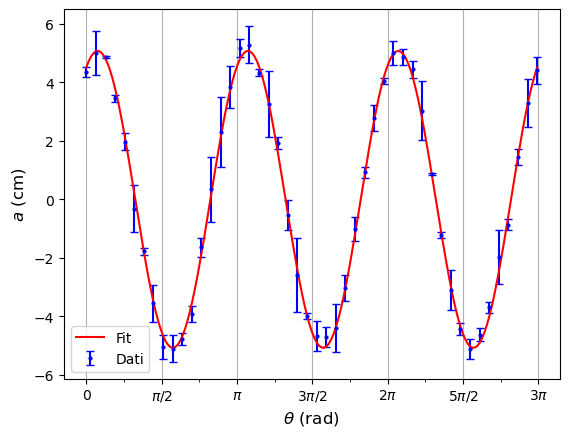

In [25]:
fig,ax = plt.subplots()

## Plot dati e fit

ax.set_xticks(tick_list)
ax.set_xticklabels(tick_labels)
ax.xaxis.set_minor_locator(MultipleLocator(np.pi/4.))
ax.grid(axis='x')

ax.set_xlabel(r'$\theta$ (rad)',fontsize=12)
ax.set_ylabel('$a$ (cm)',fontsize=12)

ax.errorbar(theta_rad,a,yerr=a_err,c='b',
            ls='none',marker='o',ms=2,capsize = 3, capthick = 1,label='Dati')

theta_ran = np.arange(0,3*np.pi,0.05)
ax.plot(theta_ran,f(theta_ran,*params),c='r',label='Fit')

ax.legend(loc='best')

Concentriamoci su un punto dei dati e del fit

In [26]:
theta_exp = theta_rad[16]
a_exp = a[16]
a_err_exp = a_err[16]
a_theo = f(theta_exp,*params)

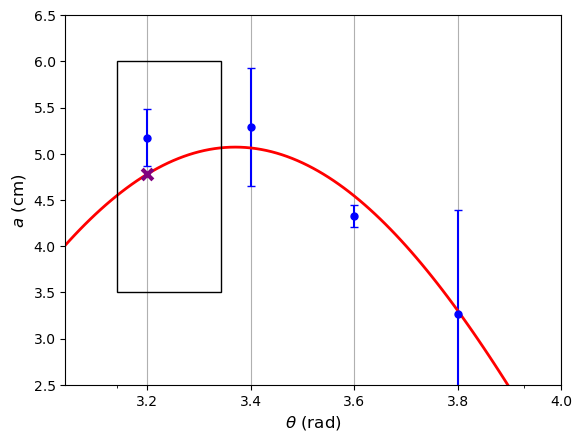

In [27]:
fig,ax = plt.subplots()

## Plot dati e fit

ax.set_xlim(np.pi-.1,4)
ax.set_ylim(2.5,6.5)

#ax.set_xticks(tick_list)
#ax.set_xticklabels(tick_labels)
ax.xaxis.set_minor_locator(MultipleLocator(np.pi/4.))
ax.grid(axis='x')

ax.set_xlabel(r'$\theta$ (rad)',fontsize=12)
ax.set_ylabel('$a$ (cm)',fontsize=12)

ax.errorbar(theta_rad,a,yerr=a_err,c='b',
            ls='none',marker='o',ms=5,capsize = 3, capthick = 1,label='Dati')

theta_ran = np.arange(3,4.1,0.01)
ax.plot(theta_ran,f(theta_ran,*params),c='r',lw=2,label='Fit')
ax.scatter(theta_exp,a_theo,c='purple',marker='x',s=60,lw=3,zorder=10)

rect = plt.Rectangle((np.pi,3.5), width=.2, height=2.5, clip_on=False,transform=ax.transData,
                     facecolor="none",edgecolor='k',zorder=3)
ax.add_patch(rect)

Facciamo l'**ipotesi** (ipotesi nulla, $H_0$) che il dato misurato sia ottenuto in maniera casuale da una distribuzione gaussiana centrata nel _valore teorico_ ottenuto dal fit e di deviazione standard pari alla deviazione standard del dato.

Text(0.0780729911543881, 5.086953504468709, '')

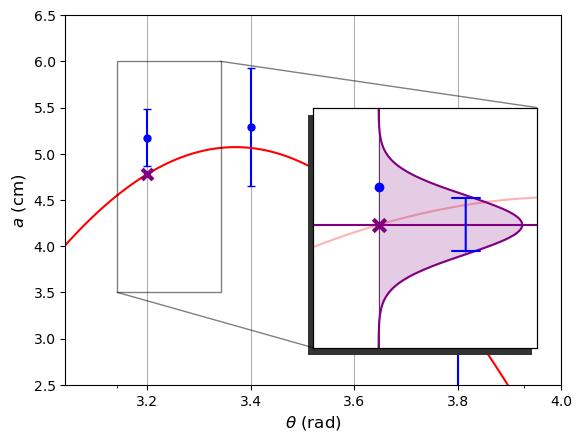

In [28]:
fig,ax = plt.subplots()

ax.set_xlim(np.pi-.1,4)
ax.set_ylim(2.5,6.5)

#ax.set_xticks(tick_list)
#ax.set_xticklabels(tick_labels)
ax.xaxis.set_minor_locator(MultipleLocator(np.pi/4.))
ax.grid(axis='x')

ax.set_xlabel(r'$\theta$ (rad)',fontsize=12)
ax.set_ylabel('$a$ (cm)',fontsize=12)

ax.errorbar(theta_rad,a,yerr=a_err,c='b',
            ls='none',marker='o',ms=5,capsize = 3, capthick = 1,label='Dati')

ax.plot(theta_ran,f(theta_ran,*params),c='r',label='Fit')
ax.scatter(theta_exp,a_theo,c='purple',marker='x',s=60,lw=3,zorder=10)



x1, x2, y1, y2 = np.pi,np.pi+0.2,3.5,6.  # subregion of the original image
axins = ax.inset_axes([0.5, 0.1, 0.45, 0.65],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
ax.indicate_inset_zoom(axins, edgecolor="black")
rect = plt.Rectangle((0.49, 0.08), width=.45, height=.65, clip_on=False,transform=ax.transAxes,
                     facecolor=".2",zorder=3)
ax.add_patch(rect)

axins.set_xticks([])
axins.set_yticks([])


axins2 = axins.twiny()
axins2.set_xticks([])
xins2_min, xins2_max = x1-theta_exp,x2-theta_exp
axins2.set_xlim(xins2_min, xins2_max)
axins2.axvline(0.5,c='k',lw=1)
#axins.errorbar(theta_rad,a,yerr=a_err,c='b',
#            ls='none',marker='o',ms=2,capsize = 3, capthick = 1,label='Dati')

axins.plot(theta_ran,f(theta_ran,*params),c='r',alpha=0.3)



normalize = xins2_max/norm.pdf(a_theo,a_theo,a_err_exp)/1.1
yran = np.linspace(3.5,7,200)
axins2.fill_betweenx(yran,norm.pdf(yran,a_theo,a_err_exp)*normalize,color='purple',
                     alpha=0.2)
axins2.plot(norm.pdf(yran,a_theo,a_err_exp)*normalize,yran,color='purple')
axins2.axhline(a_theo,c='purple',zorder=-1)
#axins2.axhline(a_exp,c='b',zorder=-1)
axins2.axvline(0,c='k',lw=.5,zorder=-1)

axins2.scatter(0,a_exp,c='b',zorder=2)
axins2.scatter(0,a_theo,c='purple',marker='x',s=80,lw=3,zorder=10)

axins2.annotate('',(norm.pdf(a_theo-a_err_exp,a_theo,a_err_exp)*normalize,a_theo-a_err_exp),
               ((norm.pdf(a_theo+a_err_exp,a_theo,a_err_exp)*normalize),a_theo+a_err_exp),
               arrowprops=dict(arrowstyle="|-|",color='b',lw=1.5))

- La somma dei residui ridotti di tutti i punti
$$
z=\sum_{i=1}^n\overline{res}_i=\sum_{i=1}^n \frac{a_i-f(\theta_i)}{\sigma_i}
$$
è distribuita come una gaussiana.

- La somma dei **quadrati** dei residui ridotti
$$
\chi^2_o=\sum_{i=1}^n\overline{res}^2_i=\sum_{i=1}^n\left[\frac{a_i-f(\theta_i)}{\sigma_i}\right]^2
$$
è una variabile casuale che segue una distribuzione **chi-quadro**.

Per il nostro fit:

In [29]:
chisq_o= np.sum(((a-f(theta_rad,*params))/a_err)**2)
print(chisq_o)

35.84173093515457


Il **numero di gradi di libertà** nel caso di un fit dipende dal **numero di parametri stimati** dai dati

In [30]:
N = len(a)-len(params)
print(N)

45


In [31]:
chiran = np.arange(0,100,0.1)

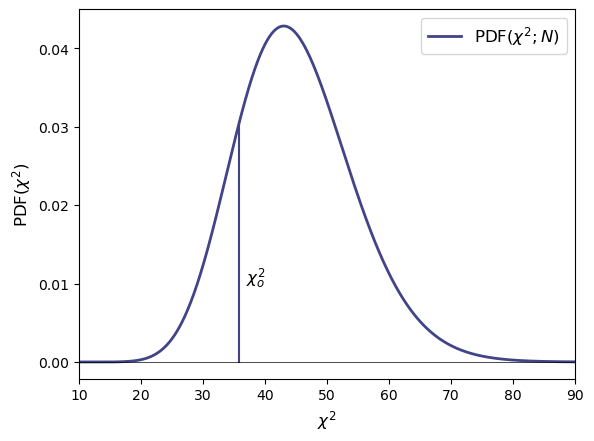

In [32]:
fig,ax = plt.subplots()


ax.set_xlim(10,90)
ax.set_xlabel('$\chi^2$',fontsize=12)
ax.set_ylabel('PDF($\chi^2$)',fontsize=12)

ax.plot(chiran,chi2.pdf(chiran,N),c=colors[2],lw=2,label='PDF($\chi^2;N$)')
ax.plot([chisq_o,chisq_o],[0,chi2.pdf(chisq_o,N)],c=colors[2])


ax.axhline(0,c='k',lw=.5)
ax.annotate(r'$\chi^2_o$',(chisq_o+1,0.01),fontsize=12)

ax.legend(loc='upper right',fontsize=12)

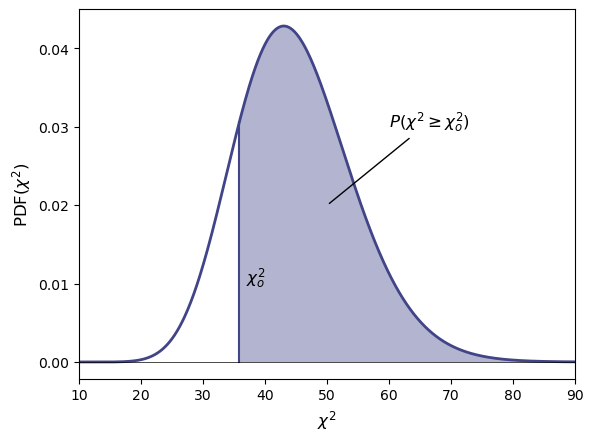

In [34]:
fig,ax = plt.subplots()


ax.set_xlim(10,90)
ax.set_xlabel('$\chi^2$',fontsize=12)
ax.set_ylabel('PDF($\chi^2$)',fontsize=12)

ax.plot(chiran,chi2.pdf(chiran,N),c=colors[2],lw=2)

chiran2 = np.linspace(chisq_o,100,200)
ax.fill_between(chiran2,chi2.pdf(chiran2,N),facecolor=colors[2],alpha=.4)

ax.plot([chisq_o,chisq_o],[0,chi2.pdf(chisq_o,N)],c=colors[2])

ax.annotate(r'$\chi^2_o$',(chisq_o+1,0.01),fontsize=12)
ax.annotate(r"$P(\chi^2\geq\chi^2_o)$",(50,0.02),(60,0.03),arrowprops=dict(arrowstyle="-"),fontsize=12)

ax.axhline(0,c='k',lw=.5)
#ax.legend(loc='upper right')

La probabilità di ottenere un valore di $\chi^2$ maggiore o uguale a quello osservato è
\begin{align}
P(\chi^2\geq\chi^2_o)&=\int_{\chi^2_o}^{+\infty}\textup{PDF}(\chi^2)d\chi^2\\
&=1-\int_{-\infty}^{\chi^2_o}\textup{PDF}(\chi^2)d\chi^2\\
&=1-\textup{CDF}(\chi^2_o)
\end{align}

Se la funzione che descrive il fenomeno fisico che stiamo studiando è davvero $f(\theta)$ con i parametri `params`, allora abbiamo una probabilità $P(\chi^2\geq\chi^2_o)$ di ottenere dei dati sperimentali con un accordo _uguale_ o _peggiore_ del nostro.

- Se la probabilità $P(\chi^2\geq\chi^2_o)$ è **alta**, significa che _statisticamente_ è molto probabile ottenere dei dati come i nostri dalla funzione $f(\theta, params)$. La funzione $f(\theta)$ con i parametri `params` ottenuti descrive bene i dati.
- Se la probabilità $P(\chi^2\geq\chi^2_o)$ è **bassa**, significa che _statisticamente_ è molto difficile ottenere dei dati come i nostri dalla funzione $f(\theta, params)$. La funzione $f(\theta)$ con i parametri `params` ottenuti _non_ descrive bene i dati.

In [35]:
Pchisq_o = 1.-chi2.cdf(chisq_o,N)
print(Pchisq_o)

0.8335576723288864


Si fissa un **livello di significatività** $\alpha$:
- $P(\chi^2\geq\chi^2_o)<\alpha$: $f(\theta)$ con `params` **non** descrive bene i dati:

  Rigettiamo l'ipotesi che i dati siano descritti da $f(\theta,params)$

# Test di modelli

Una serie di esperimenti ha permesso di ottenere i dati, con errore, nel file `./data/misure.csv`:

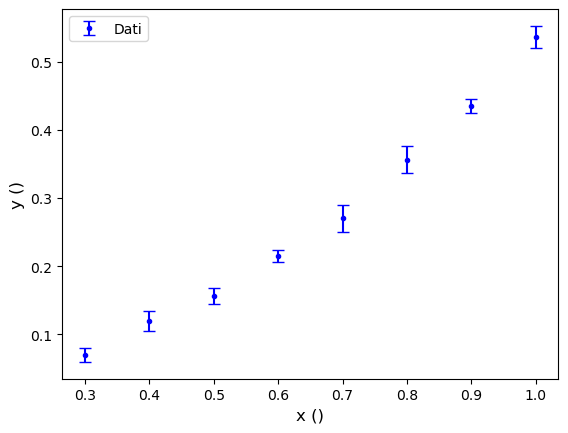

In [36]:
x,y,y_err = np.loadtxt('./data/misure.csv',delimiter=',',skiprows=1,unpack=True)

fig,ax = plt.subplots()

ax.set_xlabel(r'x ()',fontsize=12)
ax.set_ylabel('y ()',fontsize=12)

ax.errorbar(x,y,yerr=y_err,c='b',
            ls='none',marker='o',ms=3,capsize = 4, capthick = 1,label='Dati')

ax.legend(loc='best')

Quale funzione rappresenta il **modello** migliore per descrivere i dati?

1) Ottenere il fit dei dati, con errore, usando una **retta** e una **parabola**.<br>
   Per fit polinomiali, può essere più conveniente usare la funzione `np.polyfit()` di `numpy`.
3) Valutare la distribuzione dei residui.
4) Calcolare il $\chi^2_o$ nei due casi. Quanti sono i **gradi di libertà**?
5) Qual è, nei due casi, $P(\chi^2\geq\chi^2_o)$?
6) Se fissiamo il **livello di significatività** $\alpha=0.05$, a quali conclusioni arriviamo?